In [2]:
#Reducing Overfitting with Cross-Validation

In [4]:
#Use within an Jupyter notebook
%matplotlib inline   

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

X_feature_names = ['age', 'gender', 'body mass index', 'average blood pressure','bl_0','bl_1','bl_2','bl_3','bl_4','bl_5']


bins = 50*np.arange(8)
binned_y = np.digitize(y, bins)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=binned_y)

In [6]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV

gs_inst = GridSearchCV(dtr, param_grid = {'max_depth': [3,5,7,9,20]},cv=10)
gs_inst.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 20]})

In [8]:
gs_inst.best_estimator_

DecisionTreeRegressor(max_depth=3)

In [10]:
y_pred = gs_inst.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

51.547803881511754

In [12]:
import numpy as np
(np.abs(y_test - y_pred)/(y_test)).mean()

0.44490701811327393

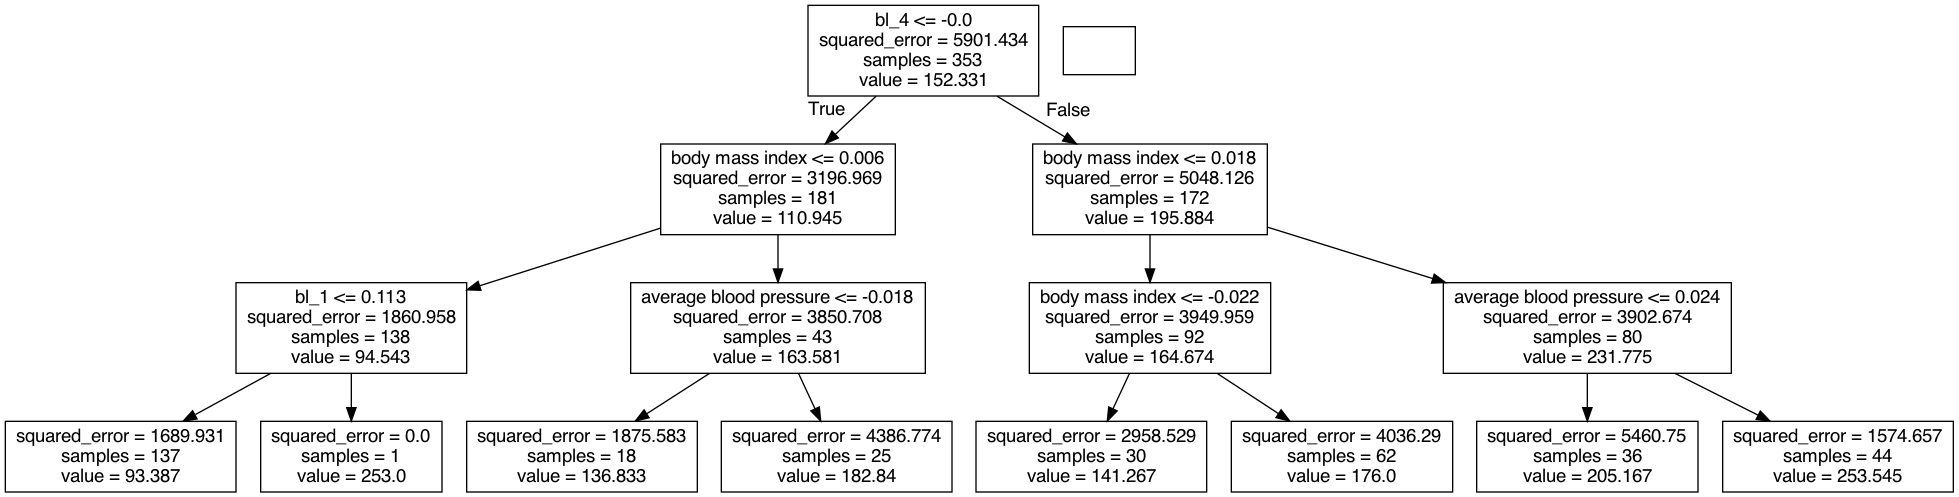

In [16]:
import numpy as np
from sklearn import tree
from io import StringIO  # Use StringIO from the io module
import pydotplus  # Use pydotplus instead of pydot
from IPython.display import Image

# Assuming gs_inst is your GridSearchCV object with a tree-based model as the best estimator
# and X_feature_names contains the feature names

dot_diabetes = StringIO()
tree.export_graphviz(gs_inst.best_estimator_, out_file=dot_diabetes, feature_names=X_feature_names)
graph = pydotplus.graph_from_dot_data(dot_diabetes.getvalue())

# Display the graph as an image
Image(graph.create_png())
